In [18]:
# Setup
positives_df_path = "/content/drive/MyDrive/Master_Thesis/positive_df.pkl"
negatives_df_path = "/content/drive/MyDrive/Master_Thesis/negative_df.pkl"

import pandas as pd
import nltk
from nltk import word_tokenize, ngrams
from nltk.probability import FreqDist
import math

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
negatives = pd.read_pickle(negatives_df_path).reset_index(drop=True)

negatives

,Title,Date,Text,Info,TrainSubjectId
0,Is receive all still broken?,2015-05-02 03:13:53,My boyfriends receive all works(on iOS) but m...,reddit post,train_subject3533
1,,2015-04-29 17:13:41,It's about a 30 mile commute mostly on free w...,reddit post,train_subject3533
2,,2015-04-29 05:51:29,"I wanna spend less than 10k, and I'd use it a...",reddit post,train_subject3533
3,,2015-04-29 01:20:07,Thank you for the advice. I was planning on b...,reddit post,train_subject3533
4,"First time Craigslist buyer, need some advice!",2015-04-28 22:21:09,I'm trying to buy a car and I'm looking at ad...,reddit post,train_subject3533
...,...,...,...,...,...
266075,,2014-02-20 22:07:35,Ice fishing?,reddit post,train_subject3418
266076,,2014-02-20 22:03:08,God. Fucking. Dammit.,reddit post,train_subject3418
266077,,2014-02-19 02:49:52,That smile...,reddit post,train_subject3418
266078,,2014-02-15 18:19:35,Yowza! Look at the gams on that bird!,reddit post,train_subject3418


In [20]:
positives = pd.read_pickle(positives_df_path).reset_index(drop=True)

positives

,Title,Date,Text,Info,TrainSubjectId
0,,2015-06-13 22:06:19,"I'm pretty sure the definition is ""It's not s...",reddit post,train_subject96
1,,2015-02-23 05:35:18,Thank you very much.,reddit post,train_subject405
2,,2015-02-23 05:00:31,Haha.,reddit post,train_subject405
3,2003 Crown Vic,2015-02-23 00:32:01,2FAFP71W23X220401,reddit post,train_subject405
4,,2015-01-30 04:22:56,I already got my refund! it was approved than...,reddit post,train_subject405
...,...,...,...,...,...
30950,,2015-07-18 23:27:05,Why thank you and greatly appreciate the info...,reddit post,train_subject8741
30951,,2014-11-14 19:09:23,Horrible caption.,reddit post,train_subject7042
30952,,2014-11-06 03:45:20,That's actually terrifying,reddit post,train_subject7042
30953,,2014-11-06 01:06:07,Where can you purchase these?,reddit post,train_subject7042


In [21]:
def entropy(list):
    freqdist = nltk.FreqDist(list)
    probs = [freqdist.freq(l) for l in freqdist]
    return -sum(p * math.log(p,2) for p in probs)

In [22]:
def tokenize(text):
  """
  Parameters:
    text (list): A list of text

  Returns:
    A tuple of unigrams and bigrams
  """
  corpus = ' '.join(text)
  tokens = word_tokenize(corpus)
  unigrams = [word for word in tokens if word.isalpha()]
  bigrams = ngrams(unigrams, 2)

  return {"unigrams": unigrams, "bigrams": list(bigrams)}

In [23]:
def count_of_documents(term, class_documents, is_check_contain_term):
  """
  Count of documents that contains/not contains term t and are not in classC

  Parameters:
    term (str) The term
    class_documents (pandas.Series) Series of documents used for checking contain term or not
    is_check_contain_term (bool) Flag indicates that count document contains term. (False = 0 = not contain; True = 1 = contain)
  """

  """
  loop all documents

  if is_check_in_class == True:
    # check documents in negative
    if is_check_contain_term == True:
      # document must contain term
    else:
      # document must not contain term
  else:
    # check documents must not in negative, in other words check documents in positive
    if is_check_contain_term == True:
      # document must contain term
     else:
      # document must not contain term
  """

  result = 0;

  for doc in class_documents:
    if (is_check_contain_term == True) and (term in doc):
      result += 1
    elif (is_check_contain_term == False) and (term not in doc):
      result += 1

  return result


In [24]:
def information_gain_against_positive_class(term, negative_documents, positive_documents):
  """
  Based on equation 13.17 (p.272) in An Introduction to Information Retrieval
  """

  all_documents = pd.concat([negative_documents, positive_documents])

  # number of documents contain term t and in class negative
  n_1_1 = count_of_documents(term, positive_documents, is_check_contain_term=True)

  # number of documents don't contain term t and in class negative
  n_0_1 = count_of_documents(term, positive_documents, is_check_contain_term=False)

  # number of documents contain term t and not in class negative (in class positive)
  n_1_0 = count_of_documents(term, negative_documents, is_check_contain_term=True)

  # number of documents don't contain term t and not in class negative (in class positive)
  n_0_0 = count_of_documents(term, negative_documents, is_check_contain_term=False)

  n_1_all = n_1_0 + n_1_1

  n_0_all = n_0_0 + n_0_1

  n_all_1 = n_0_1 + n_1_1

  n_all_0 = n_0_0 + n_1_0

  # total number of documents
  n = n_1_1 + n_1_0 + n_0_1 + n_0_0 # should equal len(all_documents)
  # print(f"Total number of documents {n}")
  # print(f"Total number of documents (from input) {len(all_documents)}")

  try:
    return (
        n_1_1 / n * math.log2(n * n_1_1 / (n_1_all * n_all_1)) +
        n_0_1 / n * math.log2(n * n_0_1 / (n_0_all * n_all_1)) +
        n_1_0 / n * math.log2(n * n_1_0 / (n_1_all * n_all_0)) +
        n_0_0 / n * math.log2(n * n_0_0 / (n_0_all * n_all_0))
    )
  except:
    # Note: there are cases that denominator can be 0, so assume IG = 0
    return 0

In [25]:
positive_tokens = tokenize(positives['Text'])

In [26]:
negative_tokens = tokenize(negatives['Text'])

In [27]:
negative_unigrams = pd.Series(negative_tokens['unigrams'])
positive_unigrams = pd.Series(positive_tokens['unigrams'])

In [28]:
most_frequent_negative_unigrams = negative_unigrams.value_counts().head(100).index
positive_unigrams_without_most_frequent_negative_unigrams = positive_unigrams[~positive_unigrams.isin(most_frequent_negative_unigrams)]
positive_unigrams_without_most_frequent_negative_unigrams.drop_duplicates(inplace=True)
positive_unigrams_without_most_frequent_negative_unigrams

1               pretty
2                 sure
4           definition
8              slander
11                true
              ...     
1143791      topically
1144296      coincided
1144472    simplifying
1144732          amber
1144826           nami
Length: 39446, dtype: object

In [14]:
information_gain_of_positive_unigrams_df = pd.DataFrame(positive_unigrams_without_most_frequent_negative_unigrams, columns=['Token'])

# Calculate IG

In [15]:
information_gain_of_positive_unigrams_df['IG'] = information_gain_of_positive_unigrams_df['Token'].apply(information_gain_against_positive_class, args=(negatives['Text'], positives['Text']))

In [30]:
ig_of_pos_unigrams_path = "/content/drive/MyDrive/Master_Thesis/ig_of_pos_unigrams.pkl"

In [16]:
information_gain_of_positive_unigrams_df.to_pickle(ig_of_pos_unigrams_path)

In [17]:
information_gain_of_positive_unigrams_df

,Token,IG
1,pretty,8.044553e-04
2,sure,5.949010e-04
4,definition,5.148225e-06
8,slander,3.074976e-07
11,true,1.145934e-05
...,...,...
1143791,topically,0.000000e+00
1144296,coincided,9.690626e-07
1144472,simplifying,1.092987e-08
1144732,amber,3.839130e-06


# Draw word cloud

In [31]:
information_gain_of_positive_unigrams_df = pd.read_pickle(ig_of_pos_unigrams_path)
information_gain_of_positive_unigrams_df

,Token,IG
1,pretty,8.044553e-04
2,sure,5.949010e-04
4,definition,5.148225e-06
8,slander,3.074976e-07
11,true,1.145934e-05
...,...,...
1143791,topically,0.000000e+00
1144296,coincided,9.690626e-07
1144472,simplifying,1.092987e-08
1144732,amber,3.839130e-06


In [32]:
information_gain_dict = dict(zip(information_gain_of_positive_unigrams_df['Token'], information_gain_of_positive_unigrams_df['IG']))
information_gain_dict

{'pretty': 0.0008044552572011492,
 'sure': 0.0005949010091321899,
 'definition': 5.148225062923985e-06,
 'slander': 3.07497638384299e-07,
 'true': 1.1459338710065976e-05,
 'doing': 0.0008849462673889419,
 'always': 0.000980940332009548,
 'developers': 4.586303210709778e-06,
 'done': 0.00030539143761183904,
 'come': 0.0003639851940755651,
 'subreddit': 3.7165406963550154e-06,
 'explanation': 4.809265308164429e-06,
 'games': 7.348683076719722e-05,
 'recently': 0.0003610043910549926,
 'gone': 0.00023004630537985956,
 'early': 8.435697799409533e-05,
 'access': 3.7982112618122093e-10,
 'entirely': 3.4441200489296556e-06,
 'coincidentally': 1.6789928860604394e-05,
 'got': 0.001031831266393701,
 'excuse': 5.8102506555083395e-05,
 'trying': 0.0008368100842896203,
 'cover': 4.943571107089538e-05,
 'falsely': 1.5394426020129183e-07,
 'flagging': 4.78454637797947e-06,
 'video': 4.4842697308008985e-05,
 'assume': 0.00010157995782108316,
 'something': 0.0014992413058297184,
 'underhanded': 5.555381

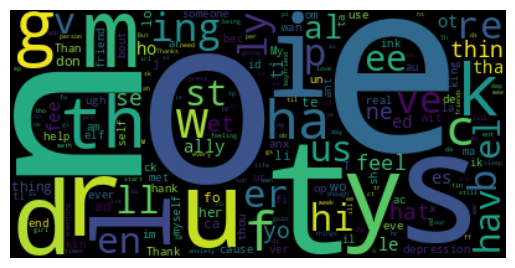

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=information_gain_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()